## Info

This is just a scratch pad for whatever. Like testing things for an interview question.

In [1]:
import pandas as pd
import sidetable 
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sma
import gc

from fnbbase.data import *
from fnbbase.fnb import *
from fnbbase.models import *

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from jupyterutils.togglecode import hideCode
import matplotlib
matplotlib.rcParams.update({'font.size':14})

pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = [i**2 for i in range(10)]
x

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3]:
x = [(2*i+1) for i in range(10)]
x

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [4]:
x = [i**2 for i in range(20) if i%1==0]
x

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

In [5]:
x = [i**2 for i in range(20) if i%2!=0]
x

[1, 9, 25, 49, 81, 121, 169, 225, 289, 361]

### PA VOTS

In [32]:
## total votes counted on 11/4 at 64%
totv = 3059891+2595818
## total votes at 84%
totv = 3085018 + 2680715
print(" total votes counted on 11/4 = {:,.0f}".format(totv))

 total votes counted on 11/4 = 5,765,733


In [33]:
## trumps lead
tlead = 3072281-2623329
tlead = 3085018 - 2680715
print("trumps leads on 11/4 = {:,.0f}".format(tlead))

trumps leads on 11/4 = 404,303


In [34]:
## remaining available votes
# pct_counted = 0.64
pct_counted = 0.84
rmv = (totv)/pct_counted - totv
print("remaining avail votes at {}% = {:,.0f}".format(1-pct_counted, rmv))

remaining avail votes at 0.16000000000000003% = 1,098,235


In [35]:
print("votes left to take lead = {:,.0f}".format(rmv - tlead))

votes left to take lead = 693,932


In [30]:
print(" 2 is 25% of what? {}   and 3 is 33% of what? {} ".format(2 / .25, 3 / .333333))

 2 is 25% of what? 8.0   and 3 is 33% of what? 9.000009000009 


### Errors?

In [5]:
cvs = 16
lams = 20
err = np.random.rand(lams,cvs)
err.shape

(20, 16)

In [6]:
def err_plot(dev, figsize=(12,8)):
    ''' a function for plotting the deviance or error
        _ = err_plot(model.model_errors.T, figsize)
    '''
    f, ax = plt.subplots(1,1, sharex=False, sharey=False, figsize=figsize)
    de = dev; xlabs='Lambda Depth'
    lc_mn = []; lc_std = [];
    for i in range(np.shape(de)[0]):
        lc_mn.append(np.mean(de[i,:], axis=0))
        lc_std.append(np.std(de[i,:], axis=0))

    yercv = [np.array(lc_std)[:], 2.0*np.array(lc_std)[:]]
    ax.errorbar(range(len(lc_mn)), np.array(lc_mn)[:], yerr=yercv, c='r',
                marker='o', ms=4, mew=1.5, mec='k', ecolor='darkorange')
    ax.set_xlabel(str(xlabs))
    plt.suptitle('Cross Validation Deviance (Error)');
    plt.legend(['Standard Error Across CVs']);

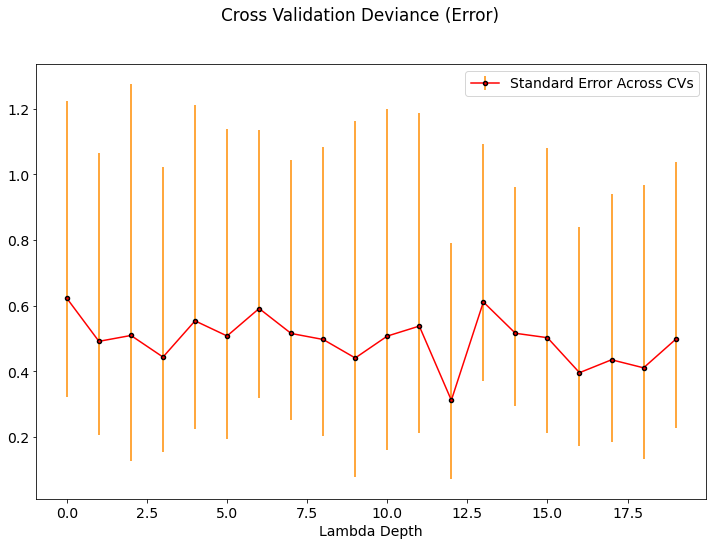

In [7]:

err_plot(err)